In [ ]:
import plotly.express as px
import panel as pn
import pandas as pd
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import csv
import unicodecsv

In [ ]:
# Bring in the Starbucks data
starbucks_df = pd.read_csv(Path('Data_Files/starbucks_locations.csv.txt'))
starbucks_df.head()

In [ ]:
# Drop unnecessary columns

drop_df = starbucks_df.drop(['Id', 'StarbucksId','Name','BrandName','StoreNumber','PhoneNumber','OwnershipType','Street1','Street2','Street3','TimezoneOffset','TimezoneId','TimezoneOlsonId','FirstSeen','LastSeen'], axis = 1)

drop_df

In [ ]:
# Filter all Non-US values/locations

newdf = drop_df.loc[drop_df['CountryCode'] == 'US']
newdf

In [ ]:
# Sort Dataframe by State
newdf = newdf.sort_values(by = 'CountrySubdivisionCode')

In [ ]:
# Sort Dataframe by State and City

newdf = newdf.sort_values(by = ['CountrySubdivisionCode', 'City'])

# Add Column to the Dataframe to capture how many stores are in each city
newdf['Count'] = ''
newdf.head(15)

In [ ]:
# Get "Average" Latitude for each City

lat_df = newdf.groupby(['CountrySubdivisionCode', 'City'])['Latitude'].mean().reset_index()
lat_df

In [ ]:
# Get "Average" Longitude for each city
lon_df = newdf.groupby(['CountrySubdivisionCode', 'City'])['Longitude'].mean().reset_index()
lon_df

In [ ]:
# Count number of Starbucks in each City
count_df = newdf.groupby(['CountrySubdivisionCode', 'City'])['Count'].count().reset_index()
count_df.head(15)

In [ ]:
# Combine Latitude and Longitude Dataframes
combined_geo_df = pd.merge(lon_df, lat_df)
combined_geo_df

In [ ]:
# Combine Lat/Lon dataframe with Store Count dataframe
combined_location_df = pd.merge(count_df,combined_geo_df)
combined_location_df

In [ ]:
# Read in city income information file

pathfile02 = Path('Data_Files/kaggle_income.csv')
income_df = pd.read_csv(pathfile02, encoding='cp1252')
income_df

In [ ]:
# Drop unnecessary columns
income_drop_df = income_df.drop(['id', 'State_Code','County','Place','Type','Primary','Zip_Code','Area_Code','ALand','AWater','Median','Stdev','sum_w'], axis=1)
income_drop_df

In [ ]:
#Drop More columns

income_drop_df = income_drop_df.drop(['State_Name','Lat','Lon'], axis=1)
income_drop_df

In [ ]:
# Sort Dataframe by City & State

income_drop_df.sort_values(by = ['State_ab', 'City'])
income_drop_df

In [ ]:
# Groupby City/State to get the average income for the city

income_avg_df = income_drop_df.groupby(['State_ab', 'City'])['Mean'].mean().reset_index()

In [138]:
# Round average income to 2 decimals

income_avg_df.round({'Mean': 2})
income_avg_df.head(15)

,CountrySubdivisionCode,City,Mean
0,AK,Alakanuk,40008.0
1,AK,Allakaket,33847.0
2,AK,Anchorage,89349.2
3,AK,Anderson,93374.0
4,AK,Barrow,94285.0
5,AK,Bethel,90822.0
6,AK,Buckland,63175.0
7,AK,Chevak,51011.0
8,AK,Chuathbaluk,48313.0
9,AK,Chugiak,133300.0


In [139]:
# Rename State column to match the combined Starbucks dataframe for merging

income_avg_df.rename(columns = {'State_ab':'CountrySubdivisionCode'}, inplace = True)

In [140]:
income_avg_df.head(15)

,CountrySubdivisionCode,City,Mean
0,AK,Alakanuk,40008.0
1,AK,Allakaket,33847.0
2,AK,Anchorage,89349.2
3,AK,Anderson,93374.0
4,AK,Barrow,94285.0
5,AK,Bethel,90822.0
6,AK,Buckland,63175.0
7,AK,Chevak,51011.0
8,AK,Chuathbaluk,48313.0
9,AK,Chugiak,133300.0


In [141]:
# Merge the income and starbucks location dataframes

joined_df = pd.merge(combined_location_df, income_avg_df)

In [142]:
# Verify Columns post-merge

joined_df.columns

Index(['CountrySubdivisionCode', 'City', 'Count', 'Longitude', 'Latitude',
       'Mean'],
      dtype='object')

In [143]:
joined_df.head(15)

,CountrySubdivisionCode,City,Count,Longitude,Latitude,Mean
0,AK,Anchorage,24,-149.856250,61.178333,89349.200000
1,AK,Eagle River,3,-149.563333,61.333333,105052.000000
2,AK,Fairbanks,5,-147.778000,64.840000,79965.250000
3,AK,Homer,1,-151.540000,59.640000,76885.000000
4,AK,Juneau,2,-134.555000,58.360000,86724.000000
5,AK,Ketchikan,1,-131.670000,55.350000,57572.666667
6,AK,Kodiak,1,-152.370000,57.810000,74363.000000
7,AK,North Pole,1,-147.350000,64.760000,98668.000000
8,AK,Palmer,2,-149.125000,61.600000,92824.000000
9,AK,Wasilla,4,-149.417500,61.580000,86586.600000


In [144]:
# Rename Columns to more accurately reflect contents

joined_df.rename(columns = {'CountrySubdivisionCode':'State'}, inplace = True)
joined_df.rename(columns = {'Count':'Store Count'}, inplace = True)
joined_df.rename(columns = {'Mean':'Avg. Income'}, inplace = True)
joined_df

,State,City,Store Count,Longitude,Latitude,Avg. Income
0,AK,Anchorage,24,-149.856250,61.178333,89349.20
1,AK,Eagle River,3,-149.563333,61.333333,105052.00
2,AK,Fairbanks,5,-147.778000,64.840000,79965.25
3,AK,Homer,1,-151.540000,59.640000,76885.00
4,AK,Juneau,2,-134.555000,58.360000,86724.00
...,...,...,...,...,...,...
2912,WY,Gillette,2,-105.490000,44.275000,92205.00
2913,WY,Jackson,2,-110.775000,43.475000,90904.50
2914,WY,Lander,1,-108.750000,42.840000,31047.00
2915,WY,Laramie,3,-105.570000,41.313333,54636.40


In [145]:
import hvplot.pandas

In [155]:
store_count_income_plot = joined_df.hvplot.scatter(
    x="Avg. Income",
    y="Store Count",
    title="Household Income to Number of Starbucks Stores",
    width=1000,
    height=600,
).opts(xformatter="%.0f")

store_count_income_plot

:Scatter   [Avg. Income]   (Store Count)

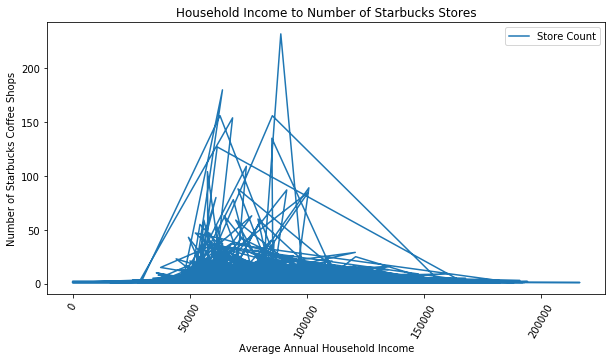

In [147]:
    min_val = joined_df['Store Count'].min()
    max_val = joined_df['Store Count'].max()
    std_val = joined_df['Store Count'].std()

    joined_df_plot = joined_df.plot(
        x="Avg. Income",
        y="Store Count",
        kind="bar", 
        xlabel="Average Annual Household Income", 
        ylabel="Number of Starbucks Coffee Shops", 
        title="Household Income to Number of Starbucks Stores", 
        figsize=(10,5), 
        rot=60, 
        ylim=(min_val-std_val,max_val+std_val)
    )

In [148]:
#Bring in Population Data
pathfile03 = Path('Data_Files/us population with cordinates.csv.txt')
population_df = pd.read_csv(pathfile03, encoding='cp1252')
population_df.tail()

,City,State,Population,lat,lon
995,West New York,New Jersey,52122,40.787879,-74.014306
996,Everett,Massachusetts,42935,42.408430,-71.053663
997,Linden,New Jersey,41301,40.622048,-74.244590
998,Asheville,North Carolina,87236,35.595058,-82.551487
999,Compton,California,97877,33.895849,-118.220071


In [149]:
#Drop lat and lon columns
population_df.drop(columns=['lat', 'lon'], inplace = True, axis=1 )
population_df.head()

,City,State,Population
0,Marysville,Washington,63269
1,Perris,California,72326
2,Cleveland,Ohio,390113
3,Worcester,Massachusetts,182544
4,Columbia,South Carolina,133358


In [150]:
#Sort values by City and State
population_df.sort_values(by = 'State')
population_df.head(10)

,City,State,Population
0,Marysville,Washington,63269
1,Perris,California,72326
2,Cleveland,Ohio,390113
3,Worcester,Massachusetts,182544
4,Columbia,South Carolina,133358
5,Waterbury,Connecticut,109676
6,Eagan,Minnesota,65453
7,Southfield,Michigan,73006
8,Lafayette,Louisiana,124276
9,Boise City,Idaho,214237


In [151]:
#Reindex columns to reflect State before City
population_reindex_df = population_df[['State', 'City', 'Population']]
population_reindex_df.head()

,State,City,Population
0,Washington,Marysville,63269
1,California,Perris,72326
2,Ohio,Cleveland,390113
3,Massachusetts,Worcester,182544
4,South Carolina,Columbia,133358


In [152]:
#Set variable us_state_to_abbrev to dictionary with State Name as Key and State Abbreviation as Value
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [153]:
#Change State column from State Name to State Abbrev using dictionary
population_reindex_df['State'] = population_reindex_df['State'].map(us_state_to_abbrev).fillna(population_reindex_df['State'])
population_reindex_df.head()

,State,City,Population
0,WA,Marysville,63269
1,CA,Perris,72326
2,OH,Cleveland,390113
3,MA,Worcester,182544
4,SC,Columbia,133358


In [123]:
#Merge Count, Income and Lat/Lon df with Population df
count_pop_income_df = pd.merge(joined_df, population_reindex_df)
count_pop_income_df.head(10)

,State,City,Store Count,Longitude,Latitude,Avg. Income,Population
0,AK,Anchorage,24,-149.856250,61.178333,89349.200000,300950
1,AL,Auburn,3,-85.476667,32.606667,52311.800000,58582
2,AL,Birmingham,16,-86.767500,33.488125,48808.166667,212113
3,AL,Decatur,2,-86.980000,34.575000,50687.500000,55816
4,AL,Dothan,1,-85.450000,31.270000,55614.833333,68001
5,AL,Florence,2,-87.660000,34.820000,52072.571429,40059
6,AL,Hoover,5,-86.800000,33.388000,104628.166667,84126
7,AL,Huntsville,7,-86.611429,34.727143,63580.222222,186254
8,AL,Madison,3,-86.750000,34.736667,97847.800000,45799
9,AL,Mobile,10,-88.153000,30.677000,51464.966667,194899


In [124]:
store_count_population_plot = count_pop_income_df.hvplot.scatter(
    x="Population",
    y="Store Count",
    title="City Population to Number of Starbucks Stores",
    width=1000,
    height=600,
).opts(xformatter="%.0f")

store_count_population_plot

:Scatter   [Population]   (Store Count)

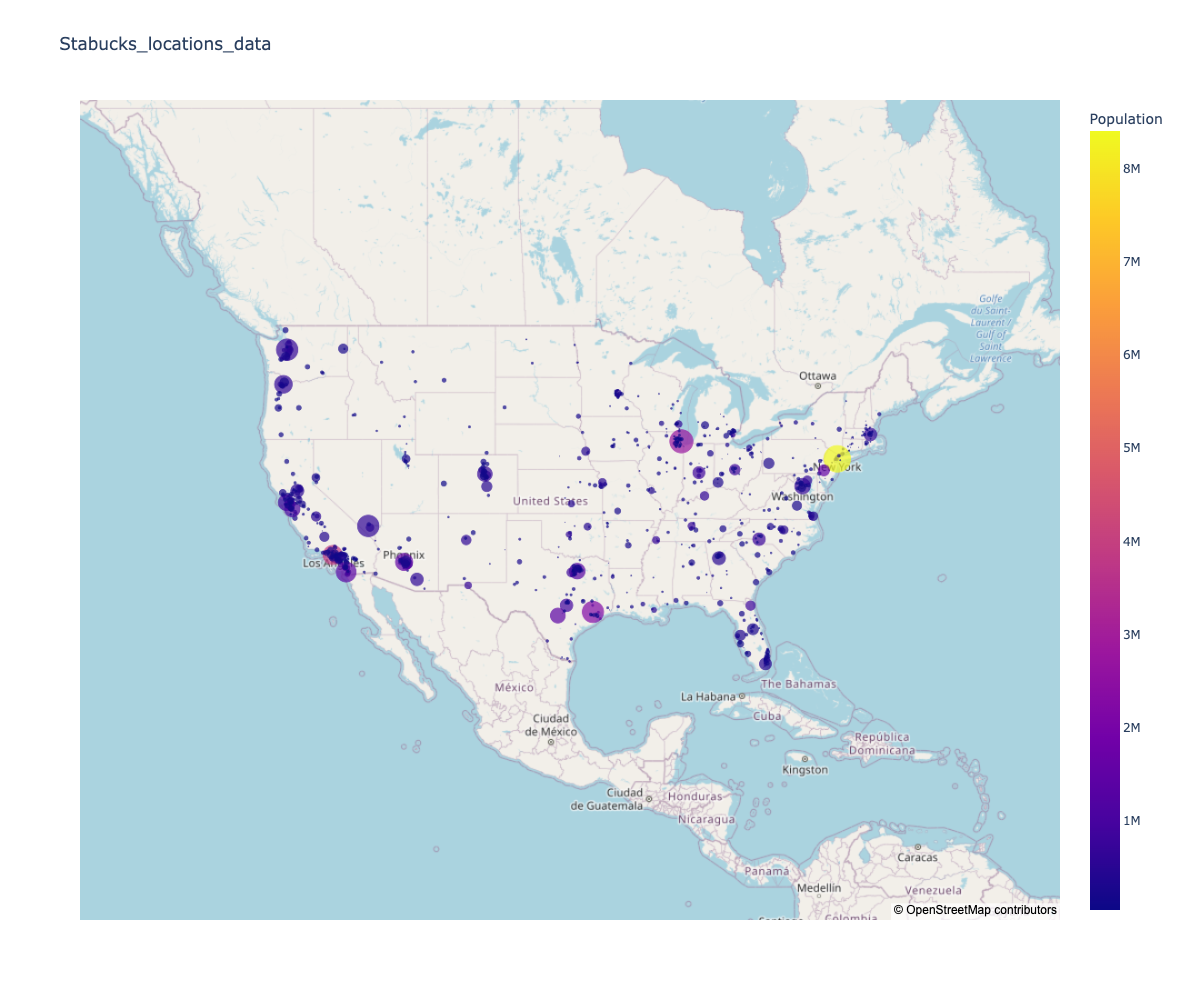

In [137]:
fo_map_1 = px.scatter_mapbox(
count_pop_income_df,
lat='Latitude',
lon='Longitude',
color='Population',
size='Store Count',
hover_name='City',
zoom=3,
mapbox_style='open-street-map',
height=1000,
title='Stabucks_locations_data'
)
fo_map_1.show()